# In questo documento andiamo a selezionare le feature singolarmente da ogni documento

In [1]:
# Importiamo le librerie

from os import listdir
from os.path import isfile, join
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import pickle

In [2]:
# Variabili globali

mypath = 'dataset'

# Indice per il file corrente da analizzare 

current = 9

# Questi campi non sono di interesse, quindi li escludiamo dalle analisi

first = []

if current == 3:
    first = ['Dst Port', 'Protocol', 'Timestamp','Flow ID','Src IP','Dst IP']
else:
    first = ['Dst Port', 'Protocol', 'Timestamp']


In [3]:
# Mi vado a prendere i path di tutti i file nella cartella dataset

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:
# Mi creo una cartella image all'interno del quale per ogni file vado a inserire le immagini d'interesse

if not os.path.exists("image"):
    os.makedirs("image")
    for a in onlyfiles:
        b = a.replace('.csv','')
        os.makedirs("image/"+b)
        os.makedirs("image/"+b+"/scatter")
        os.makedirs("image/"+b+"/istogrammi")

# Se non esiste, creo una cartella dove salvare le migliori feature

if not os.path.exists("top_feature"):
    os.makedirs("top_feature")
    for a in onlyfiles:
        b = a.replace('.csv','')
        os.makedirs("top_feature/"+b)

if not os.path.exists("pickle"):
    os.makedirs("pickle")
    for a in onlyfiles:
        b = a.replace('.csv','')
        os.makedirs("pickle/"+b)

# Per ogni documento andiamo a eseguire le operazioni di pre-processing, e a selezionare le feature d'interesse

In [5]:
document= pd.read_csv(mypath+'/'+onlyfiles[current])
scarto = []
scarto.append([])
folder = onlyfiles[current].replace('.csv','')
attaccanti_label = document['Label'].unique()[document['Label'].unique() != 'Label']

C:\Users\chiar\AppData\Local\Temp\ipykernel_31588\3663514834.py:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  document= pd.read_csv(mypath+'/'+onlyfiles[current])


In [6]:
# Andiamo a eliminare i primi 3 campi inutili

for a in first:
    document.drop(columns=a,axis=1,inplace=True)

In [7]:
# Analisi della varianza, eliminiamo tutte le feature che hanno un solo valore

for a in document.head(0):
    
    if(document[a].unique().shape[0] == 1):
        scarto[-1].append(a)
        document.drop(columns=a,axis=1,inplace=True)
    else:
        continue

In [8]:
# Creo un duplicato solo per il plot 

document_plot = document

In [9]:
document = document[document.Label != "Label"]
document_plot = document_plot[document_plot.Label != "Label"]

In [ ]:
# Andiamo a eliminare tutti i campi dove sono presenti delle stringhe come valori
'''for label in document.head(0):
    document = document[document[label] != label]
    document_plot = document_plot[document_plot[label] != label]'''

In [ ]:
print(document.shape)

In [10]:
# Andiamo a sostituire le label con valori interi

for b,c in zip(attaccanti_label,range(len(attaccanti_label))):
    document = document.replace(b, c)

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 100)
display(document)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,94658,6,7,708,3718,387,0,118.0,159.284651,1460,0,531.142857,673.118224,46757.801771,137.336517,7888.166667,11130.042594,24325,0,72880,14576.0,12590.38397,24385,363,72178,12029.666667,13189.257518,24718,0,0,0,0,0,132,152,63.386085,73.950432,0,1460,316.142857,519.205881,269574.747253,0,0,1,1,0,0,0,1,1,340.461538,118.0,531.142857,0,0,0,0,0,0,6,708,7,3718,8192,7484,3,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,206,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,9708.737864,206.0,0.0,206,206,206,206.0,0.0,206,206,0,0.0,0.0,0,0,0,0,0,0,40,0,9708.737864,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,165505,3,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,24.168454,55168.333333,95478.146491,165417,35,165505,82752.5,116980.210346,165470,35,0,0.0,0.0,0,0,0,0,0,0,72,32,18.126341,6.042114,0,0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,1,0,8192,8192,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,102429,6,7,708,3718,387,0,118.0,159.284651,1460,0,531.142857,673.118224,43210.418924,126.917182,8535.75,10956.637724,24473,0,80271,16054.2,14269.754157,31379,366,79733,13288.833333,14753.482727,30931,0,0,0,0,0,132,152,58.577161,68.340021,0,1460,316.142857,519.205881,269574.747253,0,0,1,1,0,0,0,1,1,340.461538,118.0,531.142857,0,0,0,0,0,0,6,708,7,3718,8192,7484,3,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,167,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,11976.047904,167.0,0.0,167,167,167,167.0,0.0,167,167,0,0.0,0.0,0,0,0,0,0,0,40,0,11976.047904,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
5,164387,9,7,553,3773,202,0,61.444444,87.534438,1460,0,539.0,655.432936,26315.949558,97.331297,10959.133333,28691.268597,112846,0,164387,20548.375,37811.196709,112846,12,38444,6407.333333,9634.419353,23267,0,0,0,0,0,192,152,54.748855,42.582443,0,1460,254.470588,474.712955,225352.389706,0,0,1,1,0,0,0,1,0,270.375,61.444444,539.0,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0,0,0.0,0.0,0,0,0
6,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,123,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
7,131411,3,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,30.438852,43803.666667,74427.182402,129740,51,131411,65705.5,90630.583251,129791,1620,0,0.0,0.0,0,0,0,0,0,0,72,32,22.829139,7.609713,0,0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,1,0,8192,8192,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
8,279349,3,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,14.319006,93116.333333,161044.947795,279075,60,279349,139674.5,197226.930515,279135,214,0,0.0,0.0,0,0,0,0,0,0,72,32,10.739254,3.579751,0,0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,1,0,8192,8192,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
9,20771523,6,8,708,3695,387,0,118.0,159.284651,1460,0,461.875,652.749446,211.972902,0.674,1597809.461538,5694143.313156,20548866,0,150247,30049.4,26647.716474,51700,318,20724374,2960624.857143,7755745.35494

In [12]:
# Nel documento sono presenti valori infiniti, li andiamo a sostituire con Nan che verranno successivamente rimossi

document.replace([np.inf, -np.inf], np.nan, inplace=True)
document_plot.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
display(document)

In [13]:
# Eliminiamo i valori nulli

document.dropna(inplace=True)
document_plot.dropna(inplace=True)

In [15]:
df1 = document[document.isna().any(axis=1)]
display(df1)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [16]:
# Andiamo a castare tutte le stringhe rimanenti in numeri, in quanto alcuni numeri sono rappresentati come stringhe

for label in document_plot.head(0):
    if(label != 'Label'):
        try:
            document[label] = document[label].astype(float)
            document_plot[label] = document_plot[label].astype(float)
        except:
            print(label)

In [18]:
document.replace([np.inf, -np.inf], np.nan, inplace=True)
document_plot.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Dove presenti vanno eliminati i valori str dalle righe

'''indici = []

for a in document.head(0):
    for valore,indice in zip(document[a],document[a].index):
        if type(valore) == str:
            indici.append(indice)


if(len(indici) != 0):
    
    document.drop(indici,inplace=True,axis=0)
    document_plot.drop(indici,inplace=True,axis=0)'''

In [19]:
df1 = document[document.isna().any(axis=1)]
display(df1)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
22160,0.0,2.0,0.0,31.0,0.0,31.0,0.0,15.5,21.92031,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,31.0,20.666667,17.897858,320.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,31.0,0.0,0.0,70.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22284,0.0,2.0,0.0,31.0,0.0,31.0,0.0,15.5,21.92031,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,31.0,20.666667,17.897858,320.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,31.0,0.0,0.0,980.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22600,0.0,2.0,0.0,31.0,0.0,31.0,0.0,15.5,21.92031,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,31.0,20.666667,17.897858,320.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,31.0,0.0,0.0,980.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22702,0.0,2.0,0.0,31.0,0.0,31.0,0.0,15.5,21.92031,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,31.0,20.666667,17.897858,320.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,31.0,0.0,0.0,946.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22799,0.0,2.0,0.0,31.0,0.0,31.0,0.0,15.5,21.92031,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,31.0,20.666667,17.897858,320.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,31.0,0.0,0.0,288.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22870,0.0,2.0,0.0,31.0,0.0,31.0,0.0,15.5,21.92031,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,31.0,20.666667,17.897858,320.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,31.0,0.0,0.0,980.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
22916,0.0,2.0,0.0,31.0,0.0,31.0,0.0,15.5,21.92031,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,31.0,20.666667,17.897858,320.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,31.0,0.0,0.0,946.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23158,0.0,2.0,0.0,31.0,0.0,31.0,0.0,15.5,21.92031,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,31.0,20.666667,17.897858,320.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,31.0,0.0,0.0,62.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23476,0.0,2.0,0.0,31.0,0.0,31.0,0.0,15.5,21.92031,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0,

In [20]:
document.dropna(inplace=True)
document_plot.dropna(inplace=True)

In [ ]:
print(document.shape)

In [21]:
# Definisco una funzione per normalizzare i valori

def normalize(feature:str):
    #return (document[feature]-document[feature].mean())/np.std(document[feature])
    #return document[feature]/document[feature].max()
    return (document[feature]-document[feature].min())/(document[feature].max()-document[feature].min())

def normalize_plot(feature:str):
    #return (document_plot[feature]-document_plot[feature].mean())/np.std(document_plot[feature])
    #return document_plot[feature]/document_plot[feature].max()
    return (document_plot[feature]-document_plot[feature].min())/(document_plot[feature].max()-document_plot[feature].min())


# Andiamo a normalizzare i valori per poter usare i vari algoritmi di feature selection

scaled_document = document.head(0)
scaled_document_plot = document_plot.head(0)

for a in document.head(0):
    
    try:
        if document[a].max() != 0 and a != 'Label':
            scaled_document[a] = normalize(a)
            scaled_document_plot[a] = normalize_plot(a)
        else:
            scaled_document[a] = document[a]
            scaled_document_plot[a] = document_plot[a]
    except:

        print(a)
        
        

In [ ]:
display(scaled_document)

In [22]:
df1 = scaled_document[scaled_document.isna().any(axis=1)]
display(df1)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [23]:
# A questo punto andiamo a salvare gli histogrammi delle varie feature per effettuare analisi visive

for h in scaled_document.head(0):

    # Stampo un istogramma per ogni valori di label, così da avere la suddivisione per colore
    
    for b,c in zip(attaccanti_label,range(len(attaccanti_label))):
        scaled_document[scaled_document['Label'] == c][h].hist(label=str(b))
        
    plt.legend()
    plt.title(h)
    feature_name = h.replace('/','_')
    plt.savefig('image/'+folder+'/'+'istogrammi/'+str(feature_name)+'.png')
    plt.close()

In [24]:
# Vado a suddividere il dataset in x e y per applicare successivamente, i vari algoritmi di feature selection

x_selection = scaled_document.iloc[:,:-1]
y_selection = scaled_document.iloc[:,-1:]

In [25]:
print(y_selection.shape)
print(x_selection.isna().sum().sum())

(606902, 1)
0


In [26]:

# Applico il test Anova sul dataset

fvalue_Best = SelectKBest(score_func=f_classif, k=10)
fit = fvalue_Best.fit(x_selection, y_selection.astype('int'))

C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [30 32 54 55 56 57 58 59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [27]:
# Andiamo a stampare le migliori dieci feature selezionate da Anova su un file csv

features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x_selection.columns)
feature_score = pd.concat([features,features_score],axis=1)

# Assegniamo un nuovo nome alle colonne

feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(10,columns="F_Score"))

       Input_Features      F_Score
36         Bwd Pkts/s  1662.591034
14        Flow Pkts/s   764.772305
65  Init Bwd Win Byts   410.444910
35         Fwd Pkts/s   267.431734
7    Fwd Pkt Len Mean   265.695316
52   Fwd Seg Size Avg   265.695316
64  Init Fwd Win Byts   241.014361
31      Fwd URG Flags   224.743348
48     CWE Flag Count   224.743348
5     Fwd Pkt Len Max   155.396178


In [28]:
# Mi vado a salvare le migliori 10 feature ottenute dal test Anova con il relativo punteggio

feature_score.nlargest(10,columns="F_Score").to_csv('top_feature/'+folder+'/anova.csv',index=False)

In [29]:
print(x_selection.head(0),y_selection.head(0))

Empty DataFrame
Columns: [Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, TotLen Fwd Pkts, TotLen Bwd Pkts, Fwd Pkt Len Max, Fwd Pkt Len Min, Fwd Pkt Len Mean, Fwd Pkt Len Std, Bwd Pkt Len Max, Bwd Pkt Len Min, Bwd Pkt Len Mean, Bwd Pkt Len Std, Flow Byts/s, Flow Pkts/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Tot, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Tot, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Len, Bwd Header Len, Fwd Pkts/s, Bwd Pkts/s, Pkt Len Min, Pkt Len Max, Pkt Len Mean, Pkt Len Std, Pkt Len Var, FIN Flag Cnt, SYN Flag Cnt, RST Flag Cnt, PSH Flag Cnt, ACK Flag Cnt, URG Flag Cnt, CWE Flag Count, ECE Flag Cnt, Down/Up Ratio, Pkt Size Avg, Fwd Seg Size Avg, Bwd Seg Size Avg, Fwd Byts/b Avg, Fwd Pkts/b Avg, Fwd Blk Rate Avg, Bwd Byts/b Avg, Bwd Pkts/b Avg, Bwd Blk Rate Avg, Subflow Fwd Pkts, Subflow Fwd Byts, Subflow Bwd Pkts, Subflow Bwd Byts, Init Fwd Wi

In [30]:
# Utilizziamo altri metodi di feature extraction per prendere le migliori 10 feature

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_selection, y_selection.astype('int'))

C:\Users\chiar\AppData\Local\Temp\ipykernel_31588\4268670838.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(x_selection, y_selection.astype('int'))


In [31]:
features_score = pd.DataFrame(clf.feature_importances_)
features = pd.DataFrame(x_selection.columns)
feature_score = pd.concat([features,features_score],axis=1)

# Assegniamo un nuovo nome alle colonne

feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(15,columns="F_Score"))

       Input_Features   F_Score
17       Flow IAT Max  0.058097
14        Flow Pkts/s  0.057511
35         Fwd Pkts/s  0.055255
64  Init Fwd Win Byts  0.052422
36         Bwd Pkts/s  0.049876
0       Flow Duration  0.049420
19        Fwd IAT Tot  0.044235
13        Flow Byts/s  0.042386
15      Flow IAT Mean  0.041460
24        Bwd IAT Tot  0.039845
22        Fwd IAT Max  0.038287
18       Flow IAT Min  0.033446
27        Bwd IAT Max  0.032258
16       Flow IAT Std  0.029738
20       Fwd IAT Mean  0.026060


In [32]:
# Mi vado a salvare le migliori 10 feature ottenute dal test Anova con il relativo punteggio

feature_score.nlargest(10,columns="F_Score").to_csv('top_feature/'+folder+'/ExtraTree.csv',index=False)

In [33]:
# Utilizziamo SVM come metodo di feature selection

features_names = x_selection.head(0)
svm = svm.SVC(kernel='linear',max_iter=400)
svm.fit(x_selection, y_selection.astype('int'))

C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=400)

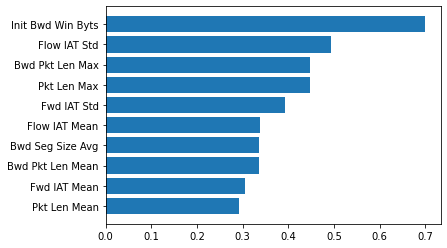

In [34]:
# Questa è una funziona che mi permette di visualizzare le migliori feature

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names[-10:])), imp[-10:], align='center')
    plt.yticks(range(len(names[-10:])), names[-10:])
    plt.show()


f_importances(abs(svm.coef_[0]), features_names)

In [35]:
top_svm = pd.DataFrame()

for a in sorted(zip(abs(svm.coef_[0]),features_names),reverse=True):
    top_svm = pd.concat([top_svm, pd.DataFrame([a])], ignore_index=True)

top_svm.rename(columns = {0:'F_Score', 1:'Input_Features'}, inplace = True)
print(top_svm.head(10))

top_svm.nlargest(10,columns="F_Score").to_csv('top_feature/'+folder+'/SVM.csv',index=False)

    F_Score     Input_Features
0  0.698144  Init Bwd Win Byts
1  0.493065       Flow IAT Std
2  0.448072    Bwd Pkt Len Max
3  0.447087        Pkt Len Max
4  0.392611        Fwd IAT Std
5  0.338925      Flow IAT Mean
6  0.335222   Bwd Seg Size Avg
7  0.335222   Bwd Pkt Len Mean
8  0.305445       Fwd IAT Mean
9  0.292430       Pkt Len Mean


In [36]:
# Ultimo metodo di feature selection che utilizziamo è quello RFE, che sta per Recorsive Feature Elimination

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
# fit RFE
rfe.fit(x_selection, y_selection.astype('int'))

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)

In [37]:
# Andiamo a salvare le feature in un file csv

features_score = pd.DataFrame(rfe.ranking_)
features = pd.DataFrame(x_selection.columns)
feature_score = pd.concat([features,features_score],axis=1)

feature_score.columns = ["Input_Features","F_Score"]
feature_score.sort_values('F_Score',inplace=True,ascending=False,axis=0)
feature_score.nsmallest(10,columns="F_Score").to_csv('top_feature/'+folder+'/RFE.csv',index=False)

In [38]:
# Per non creare un solo file troppo ricco di codice salviamo i dataset in formato pickle 
# per utilizzarlo successivamente in un altro file

with open('pickle/'+folder+'/scaled_document.pickle', 'wb') as handle:
    pickle.dump(scaled_document, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()
with open('pickle/'+folder+'/scaled_document_plot.pickle', 'wb') as handle:
    pickle.dump(scaled_document_plot, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()